In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [24]:
GENRES = ["classical", "country", "edm", "hip-hop", "jazz", "pop", "rap", "rnb", "rock"]

In [25]:
all_tracks_df = pd.DataFrame()
for genre in GENRES:
    genre_df = pd.read_pickle(f"../data_deprecated/spotify_dataset_{genre}.pkl")
    all_tracks_df = pd.concat([all_tracks_df, genre_df])

all_tracks_df = all_tracks_df[~all_tracks_df.index.duplicated(keep="first")]
cleaned_tracks_df = all_tracks_df.drop(["artists", "name", "popularity", "release_year"], axis=1)
cleaned_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927000,0.830000,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995000,0.943000,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995000,0.887000,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984000,0.760000,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994000,0.901000,0.0823,0.0634,69.043,378733,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1Bj6YgjjPbEb4jhQ50T8tJ,rock,0.6030,0.50300,2,-14.862,1,0.0379,0.290000,0.001280,0.1350,0.6470,168.512,335840,4
0y5a9zXjz7NSEkRCPKNZwP,rock,0.4450,0.91300,2,-4.789,0,0.0434,0.028500,0.000000,0.3760,0.7640,97.620,184547,4
0Q2dRzhPWFOex89dOjbq5Y,rock,0.4860,0.43300,9,-13.210,1,0.0439,0.192000,0.031000,0.1240,0.2950,110.936,547960,4
6E3NosMXYlGD21K7KqIxQ1,rock,0.3930,0.87200,2,-2.530,1,0.0401,0.000122,0.000407,0.3120,0.3930,150.097,214347,4


<AxesSubplot:ylabel='genre'>

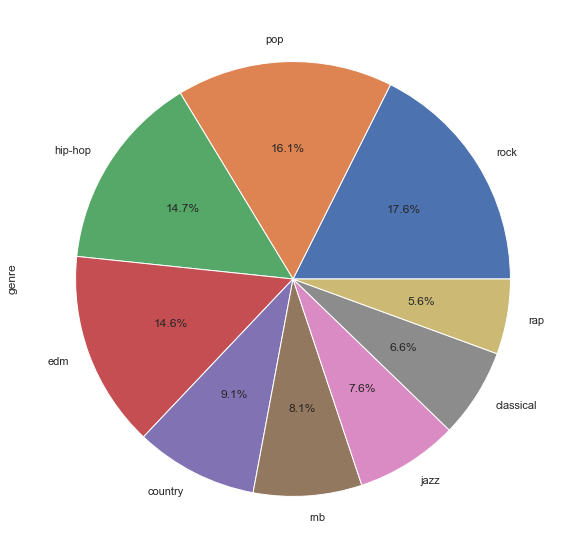

In [26]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10))

<AxesSubplot:>

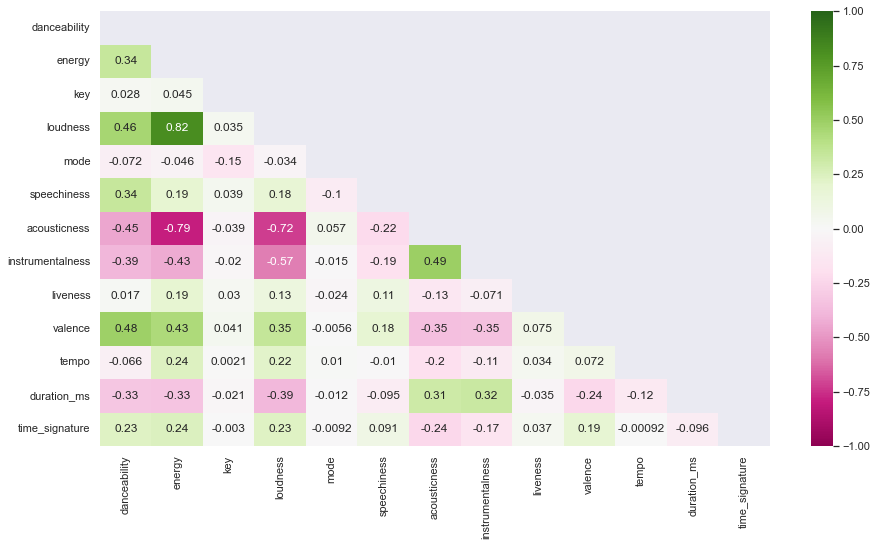

In [27]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(cleaned_tracks_df.corr(), dtype=bool))
sns.heatmap(cleaned_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG")

Loudness and Energy seem to have a strong positive correlation. Acousticness and Energy have a strong negative correlation. There are some other weaker relationships too, such as Acousticness/Loudness, Instrumentalness/Loudness, Instrumentalness/Acousticness and Valence/Danceability.

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

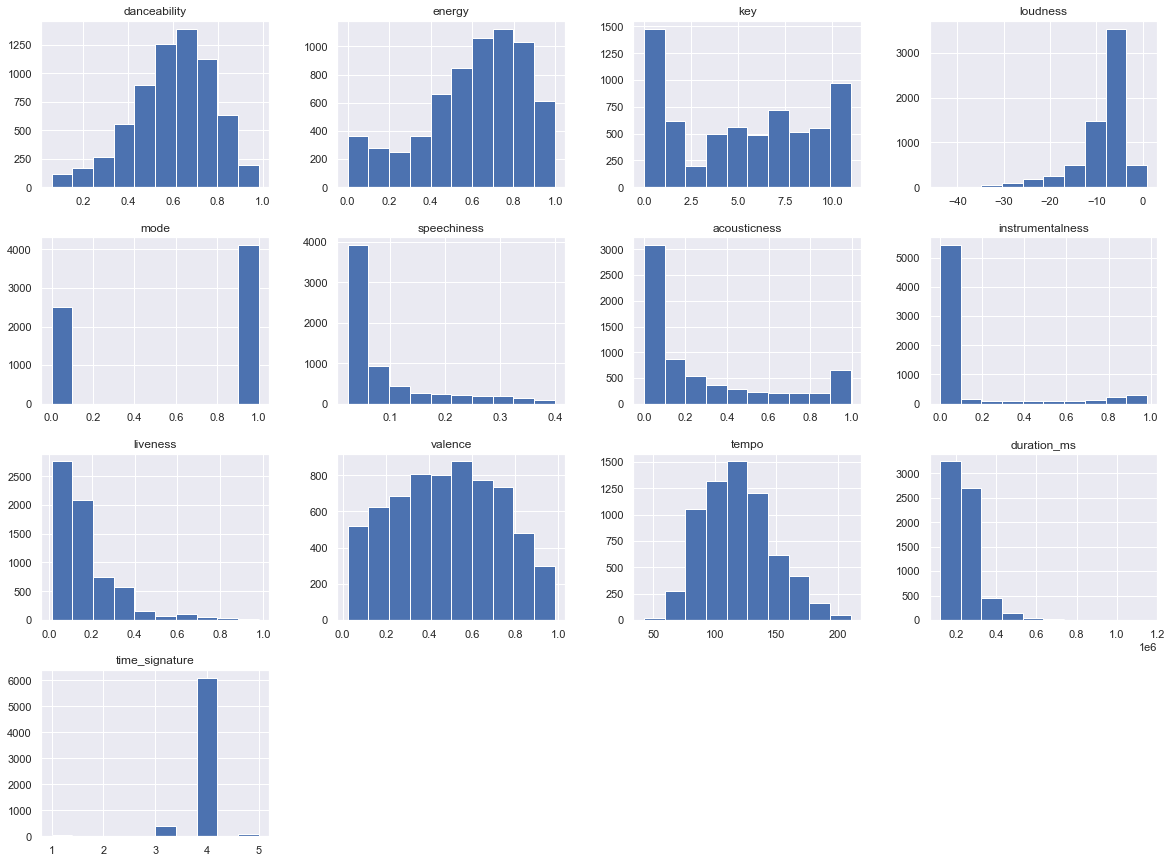

In [37]:
cleaned_tracks_df.hist(figsize=(20,15))

Danceability and Tempo are the most normally distributed (with slight negative and positive skew respectively).

In [41]:
cleaned_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6.607000e+03,6607.000000
mean,0.600350,0.605190,5.260633,-8.695047,0.622219,0.092089,0.273430,0.114131,0.177274,0.483545,118.713822,2.417576e+05,3.933858
std,0.178298,0.247694,3.549042,5.723515,0.484869,0.088158,0.321424,0.266109,0.140976,0.245420,28.675090,8.224978e+04,0.344081
min,0.061000,0.000885,0.000000,-43.738000,0.000000,0.022400,0.000003,0.000000,0.013600,0.023700,42.313000,1.201330e+05,1.000000
25%,0.492000,0.461000,2.000000,-10.169000,0.000000,0.036900,0.023500,0.000000,0.092000,0.287000,95.815500,1.928525e+05,4.000000
50%,0.618000,0.651000,5.000000,-6.936000,1.000000,0.050200,0.120000,0.000014,0.121000,0.489000,119.775000,2.243480e+05,4.000000
75%,0.729000,0.798000,8.000000,-5.091500,1.000000,0.106000,0.433500,0.008765,0.220000,0.679000,135.252500,2.672930e+05,4.000000
max,0.983000,0.998000,11.000000,0.915000,1.000000,0.400000,0.996000,0.982000,0.979000,0.985000,210.857000,1.148947e+06,5.000000
